# Monte Carlo Simulation of Investment Portfolio Performance: 
> Descriptive Statistics, Hypothesis Testing, and Variance Reduction Techniques

### Example

1. **Objective:** To estimate the potential future value of the investment portfolio (for example: stock+Bonds+Real states) and assess the associated risks using Monte Carlo simulation.

2. **Steps:**
    - **Define the investment portfolio:**
        - Identify the assets in the portfolio.
        - Assign weights to each asset, representing the allocation or proportion of the portfolio invested in that asset.
        - Determine the historical returns and standard deviations of the assets.
    
    - **Set simulation parameters:**
        - Specify the number of simulations to run.
        - Define the time horizon for the simulation (e.g., number of years).

    - **Perform Monte Carlo simulation:**
        - Generate random samples for each asset's future returns based on their historical return distributions.
        - Calculate the future portfolio values for each simulation by combining the weighted returns of the assets over the time horizon.

    - **Analyze the simulation results:**
        - Calculate descriptive statistics such as mean, standard deviation, minimum, and maximum of the simulated portfolio values.
        - Construct confidence intervals to estimate the range of potential future portfolio values with a certain level of confidence.
        - Visualize the distribution of portfolio values using histograms or density plots.
        - Assess the portfolio's risk metrics, such as Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), to measure the downside potential.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Define the investment portfolio
assets = ['Stocks', 'Bonds', 'Real Estate']
weights = np.array([0.6, 0.3, 0.1])  # Asset allocation weights
returns = np.array([0.08, 0.04, 0.06])  # Historical returns
volatility = np.array([0.15, 0.08, 0.12])  # Standard deviations

In [15]:
# Set simulation parameters
num_simulations = 1000
num_years = 10

# Perform Monte Carlo simulation
portfolio_values = np.zeros((num_years + 1, num_simulations))
portfolio_values[0] = 100000  # Initial portfolio value

for year in range(1, num_years + 1):
    for sim in range(num_simulations):
        random_returns = np.random.normal(returns, volatility)
        portfolio_value = portfolio_values[year - 1, sim] * np.dot(weights, 1 + random_returns)
        portfolio_values[year, sim] = portfolio_value

In [16]:
# Analyze the simulation results
df_portfolio_values = pd.DataFrame(portfolio_values.T, columns=['Year ' + str(year) for year in range(num_years + 1)])

In [17]:
df_portfolio_values.head()

,Year 0,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
0,100000.0,103761.928269,108411.533743,99856.811648,103044.410923,91068.778313,83279.190871,85787.828697,95167.810003,104182.330175,109608.037396
1,100000.0,98351.089245,107522.459294,124102.624055,119223.279158,132515.592555,150747.140587,164611.944656,216709.248326,247901.758351,285314.889978
2,100000.0,117136.690114,151183.587800,153774.553549,148862.847958,168056.949799,177627.789885,189580.583457,196782.684190,244670.700713,228645.910770
3,100000.0,80723.560836,90557.369802,89699.045159,96915.029152,71175.657128,78116.524466,92732.704463,103380.961938,114238.728379,127003.987318
4,100000.0,102003.002115,106317.354167,109889.487592,97875.000435,115950.844319,116759.919818,111186.421723,107058.155499,128345.259585,149818.221087


In [18]:
# Calculate descriptive statistics
statistics = df_portfolio_values.describe().T[['mean', 'std', 'min', 'max']]

# Print results
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
                  mean           std            min            max
Year 0   100000.000000      0.000000  100000.000000  100000.000000
Year 1   106674.202186   9686.963214   75202.893518  136363.671389
Year 2   113924.435735  14229.084840   73853.117728  161018.138613
Year 3   122148.030164  18835.814352   71724.835699  208706.057274
Year 4   129577.022898  23366.717703   66966.902747  224539.713521
Year 5   138549.674879  28119.198249   68695.793962  229751.602172
Year 6   147526.889847  33281.196091   64680.821104  288299.635522
Year 7   157215.381706  38271.774549   64556.373553  318718.728071
Year 8   167064.870221  43276.831869   62191.809016  326253.671951
Year 9   178467.145966  48621.466329   67250.234145  358447.343037
Year 10  190296.098011  53872.676545   64567.560340  390884.412872


In [14]:
# Calculate confidence intervals
confidence_level = 0.95
confidence_intervals = df_portfolio_values.quantile([(1 - confidence_level) / 2, 1 - (1 - confidence_level) / 2])

print("\nConfidence Intervals ({}% confidence level):".format(int(confidence_level * 100)))
confidence_intervals


Confidence Intervals (95% confidence level):


,Year 0,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
0.025,100000.0,87526.950082,86098.653014,87137.483535,88549.218132,89160.18864,92595.066507,95182.631924,97702.391667,100452.132453,105341.169805
0.975,100000.0,124868.730505,140525.632202,157271.437976,175748.793598,194178.64006,214627.686925,230185.092244,255169.977589,277238.799198,295182.497768


In [19]:
# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

In [20]:
print("\nRisk Metrics:")
print("Value-at-Risk (VaR) at 95% confidence level:", var_95)
print("Conditional Value-at-Risk (CVaR) at 95% confidence level:", cvar_95)


Risk Metrics:
Value-at-Risk (VaR) at 95% confidence level: 111675.51246811391
Conditional Value-at-Risk (CVaR) at 95% confidence level: 96364.0182802908


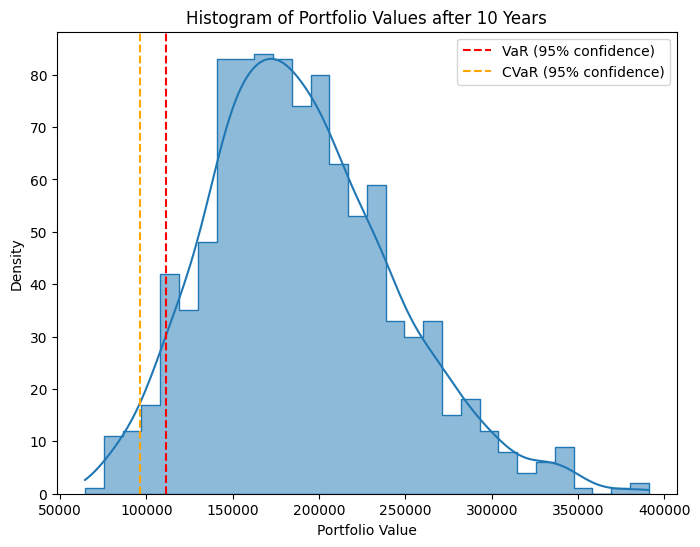

In [21]:
# Plotting a histogram of the portfolio values using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_portfolio_values['Year 10'], bins=30, kde=True, element='step')
plt.xlabel('Portfolio Value')
plt.ylabel('Density')
plt.title('Histogram of Portfolio Values after 10 Years')

# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

# Add vertical lines to mark Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR)
plt.axvline(x=var_95, color='red', linestyle='--', label='VaR (95% confidence)')
plt.axvline(x=cvar_95, color='orange', linestyle='--', label='CVaR (95% confidence)')

plt.legend()
plt.show()

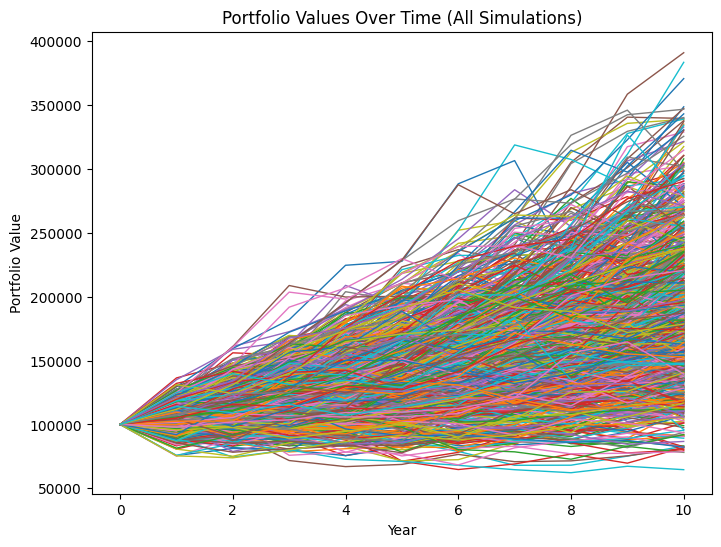

In [23]:
plt.figure(figsize=(8, 6))
for sim in range(num_simulations):
    plt.plot(range(num_years + 1), df_portfolio_values.iloc[sim, :], linewidth=1)

plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values Over Time (All Simulations)')
plt.show()


### Conclusion

- In this example, we consider an investment portfolio consisting of stocks, bonds, and real estate. We specify the weights, historical returns, and standard deviations for each asset. We set the simulation parameters to run 1000 simulations over a 10-year time horizon.

- The Monte Carlo simulation generates random samples for each asset's future returns using the normal distribution with the specified mean returns and standard deviations. The future portfolio values are calculated by multiplying the previous portfolio value by the weighted returns for each simulation.

- The simulation results are stored in a dataframe `df_portfolio_values`, which contains the portfolio values for each simulation and year. We calculate descriptive statistics, including mean, standard deviation, minimum, and maximum values. We construct confidence intervals to estimate the range of potential future portfolio values.

- We visualize the distribution of portfolio values after 10 years using a histogram. Additionally, we calculate risk metrics such as `Value-at-Risk (VaR)` and `Conditional Value-at-Risk (CVaR)` at the `95%` confidence level.

> **Note:**
> Please note that this example assumes a simplified scenario and should not be considered as financial advice. It's crucial to conduct
> further research and consult with a financial professional before making any investment decisions.

## Reference

- https://github.com/arunsinp/MonteCarlo-simulation/tree/main